## The general idea for my statistic is that the best neighborhood will have the least amount of traffic.

# Traffic Metric

In [2]:
# load pandas
import pandas as pd
from matplotlib import pyplot as plt

#open csv file
traffic_count_csv = pd.read_csv("traffic_count.csv", sep=",")
traffic_count_csv
#grab only specific columns I need
traffic_count = traffic_count_csv[['device_id','average_daily_car_traffic','neighborhood','count_end_date']]
#traffic_count -- Removed. Only needed for testing.



## Performing data cleaning on my dataset. Removing all NULL characters.

In [3]:
#performing cleaning operations on dataset
traffic_count.dropna(inplace=True)

#traffic_count.dropna(axis='index', how='any', subset=['average_daily_car_traffic']) -- Removed. Only needed for testing.
#traffic_count.dropna() -- Removed. Only needed for testing.

traffic_count.sort_values(by='count_end_date', ascending=True)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,device_id,average_daily_car_traffic,neighborhood,count_end_date
52,37,976.0,Greenfield,2018-06-21
109,39,5327.0,Highland Park,2018-07-11
17,36,7688.0,Highland Park,2018-07-12
3,9,2741.0,Squirrel Hill South,2018-08-01
10,8,5592.0,Squirrel Hill South,2018-08-01
...,...,...,...,...
224,242,3819.0,Homewood South,2020-02-22
226,244,2651.0,Point Breeze North,2020-02-22
222,240,5357.0,Homewood North,2020-02-22
223,241,6446.0,Homewood South,2020-02-22


## Reading dataset information into a dictionary.

In [4]:
#read columns into dictionary
traffic_count_dict = {}
#length = traffic_count.count()[0]
length = len(traffic_count.index)
#print(length)
counter = 0
while not counter >= length:
    row = traffic_count.iloc[counter]
    
    """
    To clarify on a few points here, I am doing this in a very backwards way, or at least it feels like I am.
    Anyway, the "row" variable is being used as a sort of "pointer" to grab data from each column using a 0, 1, 2, etc.
    In this specific instance, I only have two columns. 0 being average_daily_car_traffic, and 1 being neighborhood. This is how
    I am grabbing the data from each column for every row.
    This will only save the most RECENT data, since I am sorting the dataset before I am performing this by "count_end_date" ascending.
    """
    traffic_count_dict[row[0]] = row[1], row[2]
    
    #increasing counter by one
    counter+=1
        

## Show all information that has been sorted into dictionary.

In [166]:
#for key,value in traffic_count_dict.items(): -- Removed. Only needed for testing.
#    print(str(key) + ": " + str(value)) -- Removed. Only needed for testing.

85: (4949.0, 'Polish Hill')
9: (2741.0, 'Squirrel Hill South')
76: (1046.0, 'Central Northside')
87: (3015.0, 'Polish Hill')
8: (5592.0, 'Squirrel Hill South')
65: (1455.0, 'Bluff')
176: (11500.0, 'Crafton Heights')
72: (6793.0, 'Shadyside')
36: (7688.0, 'Highland Park')
118: (10350.0, 'North Shore')
50: (9435.0, 'East Liberty')
23: (3860.0, 'Mount Washington')
173: (9709.0, 'Brookline')
202: (613.0, 'Shadyside')
179: (1163.0, 'East Liberty')
169: (7686.0, 'Mount Washington')
133: (3239.0, 'Squirrel Hill North')
73: (1120.0, 'Bloomfield')
26: (9546.0, 'Squirrel Hill South')
114: (6984.0, 'Bloomfield')
61: (8512.0, 'Larimer')
106: (4448.0, 'Friendship')
116: (3150.0, 'Squirrel Hill North')
92: (12335.0, 'Point Breeze')
192: (16729.0, 'Regent Square')
115: (8911.0, 'East Liberty')
3: (8407.0, 'East Liberty')
132: (1265.0, 'Point Breeze')
55: (1786.0, 'Central Lawrenceville')
196: (527.0, 'Knoxville')
24: (3776.0, 'Central Oakland')
31: (6443.0, 'Strip District')
111: (6984.0, 'Bloomfield

## Top 5-10 light traffic areas
### This is done by using the previously populated dataset dictionary and throwing it into a series. I later decided this was obsolete and simply used the information straight from my dataset. This can be seen in the last line of this code snippet.

In [5]:
traffic_count_series = pd.Series(traffic_count_dict)

traffic_count_series.sort_values(ascending=True)[:10]


traffic_count.sort_values(['average_daily_car_traffic', 'count_end_date'], ascending=[True, False], inplace=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Graph of data in bar graph style.
### I used an interesting method of plotting the graph, but it works.

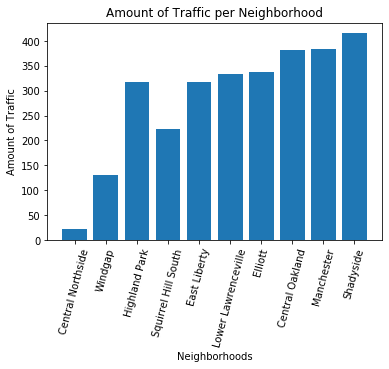

In [6]:
plt.bar(traffic_count['neighborhood'][:11], traffic_count['average_daily_car_traffic'][:11])
plt.xlabel('Neighborhoods')
plt.ylabel('Amount of Traffic')
plt.title('Amount of Traffic per Neighborhood')
plt.xticks(rotation=75)

plt.show()

## Grabbing relevant data into weighted dictionary.
### This is again done in an interesting way. I spent a lot of time on this code snippet, but it works well enough for my needs.
### I go through each neighborhood in the top 10, and assign it to the dictionary. If the dictionary already holds that neighborhood name, it will add the values together.

In [103]:
# getting weights for metrics
traffic_count_weight_dict = {}
#counter = 10 -- Removed. Only needed for testing.
#key_counter = 2 -- Removed. Only needed for testing.
for neighborhood, traffic in zip(traffic_count.sort_values(['average_daily_car_traffic'], ascending=True)['neighborhood'][:10], traffic_count.sort_values(['average_daily_car_traffic'], ascending=True)['average_daily_car_traffic'][:10]):
    #print(str(neighborhood) + ": " + str((float(traffic)/16))) -- Removed. Only needed for testing.
    #performing weight conversion
    weighted_traffic = (float(traffic)/24)
    #if statement to check if neighborhood is already in list. if so, then populate with neighborhood name + key_counter
    if neighborhood in traffic_count_weight_dict:
        traffic_count_weight_dict[(neighborhood)] += weighted_traffic
        #key_counter += 1 -- Removed. Only needed for testing.
    else:
        traffic_count_weight_dict[neighborhood] = weighted_traffic

#divide amount of traffic by 16 -- changed to 24 as the numbers are closer this way.

traffic_count_weight_dict

{'Central Northside': 0.9583333333333334,
 'Windgap': 5.458333333333333,
 'Highland Park': 19.666666666666668,
 'Squirrel Hill South': 9.291666666666666,
 'East Liberty': 13.208333333333334,
 'Lower Lawrenceville': 13.916666666666666,
 'Elliott': 14.083333333333334,
 'Central Oakland': 15.916666666666666,
 'Manchester': 16.0}

# Miles Of Major Roads Metric

In [46]:
import pandas as pd
import numpy as np

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [47]:
pgh_roads = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/5d61b60b-bd25-4c33-8420-e31a9135ec6e/download/transportation.csv",
                             parse_dates=True)

In [48]:
major_roads = pgh_roads[['Neighborhood', 'Miles of Major Roads']]



#major_roads = pgh_roads.groupby(['Neighborhood', 'Miles of Major Roads']).count()

In [49]:
#major_roads.sort_values(["Miles of Major Roads"], ascending=False)[:10]


major_roads.sort_values(['Miles of Major Roads'], ascending=False, inplace=True)

major_roads[:10]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Neighborhood,Miles of Major Roads
16,Central Business District,13.55
13,Brookline,9.15
10,Bluff,9.08
75,Squirrel Hill North,8.19
69,South Oakland,8.07
76,Squirrel Hill South,7.99
25,East Allegheny,7.59
49,Marshall-Shadeland,7.06
56,North Shore,6.81
15,Carrick,6.56


In [50]:
print("The neighborhood that includes the most major roads is the Central Business District.")

The neighborhood that includes the most major roads is the Central Business District.


## Grabbing relevant data into weighted dictionary.
### I go through each neighborhood in the top 10, and assign it to the dictionary.

In [54]:
# getting weights for metrics
major_roads_weight_dict = {}
#counter = 10 -- Removed. Only needed for testing.

for neighborhood, miles in zip(major_roads['Neighborhood'][:10], major_roads['Miles of Major Roads'][:10]):
    #print(str(neighborhood) + ": " + str(miles)) -- Removed. Only needed for testing.
    major_roads_weight_dict[neighborhood] = miles
    #counter -= 1 -- Removed. Only needed for testing.

major_roads_weight_dict

{'Central Business District': 13.55,
 'Brookline': 9.15,
 'Bluff': 9.08,
 'Squirrel Hill North': 8.19,
 'South Oakland': 8.07,
 'Squirrel Hill South': 7.99,
 'East Allegheny': 7.59,
 'Marshall-Shadeland': 7.06,
 'North Shore': 6.81,
 'Carrick': 6.56}

# Bridges Per Neighborhood Metric

First, lets import the pandas and the pyplot for matplotlib. Then, the data set. It is a csv so we can just use pd.read_csv to read it in.Then, we will then make a dictionary for the data set. This will help us later as we go to read in the data. 

In [61]:
import pandas as pd
from matplotlib import pyplot as plt

dataBridges = pd.read_csv('https://data.wprdc.org/datastore/dump/23f675e5-f745-49c1-8fa0-c5bc35c25184')

# make dictionary
dataBridges_dict = dict()

Next lets go through the dataframe for bridges and make a new item whenever it is a new neighborhood, and if the neighborhood is already in the dictionary (AKA a repeat neighborhood), we will just add one to the total of the item. This takes something that looks like this:

* East Hills 1
* Central Oakland 1
* Homewood South 1
* Central Oakland 1
* Troy Hill 1
* Central Oakland 1

and turns it into

* East Hills 1
* Homewood South 1
* Troy Hill 1
* Central Oakland 3

The data is now easier to understand and chart.

In [62]:
# iterate through the dataframe
for i in range(len(dataBridges)):
    # get the item name and quantity
    item = dataBridges.loc[i, 'start_neighborhood']
    
    if item in dataBridges_dict: # if it's in the dict
        dataBridges_dict[item] += 1 # add the quantity to it
    else:
        dataBridges_dict[item] = 1 # otherwise, set it to the quantity

Then we will convert the dictionary back into a series.

In [63]:
dataBridges_series = pd.Series(dataBridges_dict, name = "Bridges")

In [148]:
dataBridges_series.sort_values()[:]

Lower Lawrenceville           1
Manchester                    1
Northview Heights             1
Summer Hill                   1
Allentown                     1
Banksville                    1
Beechview                     1
Point Breeze North            1
Swisshelm Park                1
East Liberty                  1
Central Northside             1
Allegheny West                1
Fineview                      1
Regent Square                 1
Squirrel Hill North           1
North Oakland                 1
Spring Hill-City View         1
Esplen                        1
Strip District                1
Perry South                   1
Bluff                         2
Lincoln-Lemington-Belmar      2
Windgap                       2
Elliott                       2
Sheraden                      2
Brighton Heights              2
Highland Park                 2
South Shore                   2
Arlington                     2
Marshall-Shadeland            2
Brookline                     2
Mount Wa

In [149]:
dataBridges_series.sort_values(ascending=False)[:10]

Squirrel Hill South          16
South Side Flats              8
Troy Hill                     8
Central Business District     7
Shadyside                     7
Hays                          5
Hazelwood                     5
Oakwood                       5
Overbrook                     4
West End                      4
Name: Bridges, dtype: int64

Text(0, 0.5, 'Total amount of bridges')

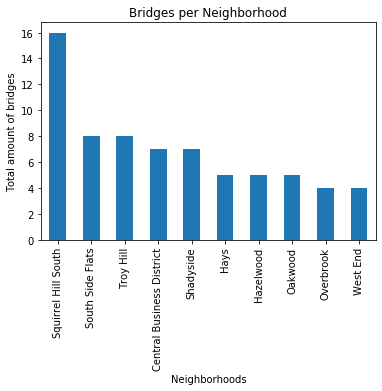

In [64]:
dataBridges_series.sort_values(ascending=False)[:10].plot.bar()
plt.title('Bridges per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of bridges')

## Grabbing relevant data into weighted dictionary.
### I go through each neighborhood in the top 10, and assign it to the dictionary.

In [127]:
# getting weights for metrics
dataBridges_series_weight_dict = {}
#counter = 10 -- Removed. Only needed for testing.

for neighborhood, bridges in zip(dataBridges_series.sort_values(ascending=False).index[:10], dataBridges_series.sort_values(ascending=False)[:10]):
    print(str(neighborhood) + ": " + str(bridges))
    dataBridges_series_weight_dict[neighborhood] = bridges
    #counter -= 1 -- Removed. Only needed for testing.


Squirrel Hill South: 16
South Side Flats: 8
Troy Hill: 8
Central Business District: 7
Shadyside: 7
Hays: 5
Hazelwood: 5
Oakwood: 5
Overbrook: 4
West End: 4


# Combining pre-weighted items into one dictionary for final metric.
### This is the heavy part of the code, where I decided using a function was best.
### The function will take a dictionary that needs parsed, and a final dictionary to add the first dictionary to.
### The function will then return the filled "final_dict" for further processing.

In [121]:
#performing arithmetic to show final graph
final_weighted_dictionary = {}

# Function to add lists to final dictionary.
def add_to_final_dict(dict_to_add, final_dict):
    for neighborhood, value in dict_to_add:
        if neighborhood in final_dict:
            final_dict[neighborhood] += value
            #print(neighborhood + " found in final dict. Adding " + str(value) + " to final dict value.") -- Removed. Only needed for testing.
        else:
            final_dict[neighborhood] = value
    return final_dict


# Sorting dictionaries based on values, then assigning to a new variable for easier access.
traffic = sorted(traffic_count_weight_dict.items(), key=lambda item: item[1])
#print(traffic_count_weight_dict.keys()) -- Removed. Only needed for testing.

roads = sorted(major_roads_weight_dict.items(), key=lambda item: item[1])
#print(major_roads_weight_dict.keys()) -- Removed. Only needed for testing.

bridges = sorted(dataBridges_series_weight_dict.items(), key=lambda item: item[1])
#print(dataBridges_series_weight_dict.keys()) -- Removed. Only needed for testing.



# Placing traffic list into final dictionary
final_weighted_dictionary = add_to_final_dict(traffic, final_weighted_dictionary)
#print("First dict done.") -- Removed. Only needed for testing.

# Placing roads list into final dictionary
final_weighted_dictionary = add_to_final_dict(roads, final_weighted_dictionary)
#print("Second dict done.") -- Removed. Only needed for testing.

# Placing roads list into final dictionary
final_weighted_dictionary = add_to_final_dict(bridges, final_weighted_dictionary)
#print("Third dict done.") -- Removed. Only needed for testing.

print(final_weighted_dictionary)

{'Central Northside': 0.9583333333333334, 'Windgap': 5.458333333333333, 'Squirrel Hill South': 33.281666666666666, 'East Liberty': 13.208333333333334, 'Lower Lawrenceville': 13.916666666666666, 'Elliott': 14.083333333333334, 'Central Oakland': 15.916666666666666, 'Manchester': 16.0, 'Highland Park': 19.666666666666668, 'Carrick': 6.56, 'North Shore': 6.81, 'Marshall-Shadeland': 7.06, 'East Allegheny': 7.59, 'South Oakland': 8.07, 'Squirrel Hill North': 8.19, 'Bluff': 9.08, 'Brookline': 9.15, 'Central Business District': 20.55, 'Overbrook': 4, 'West End': 4, 'Hays': 5, 'Hazelwood': 5, 'Oakwood': 5, 'Shadyside': 7, 'South Side Flats': 8, 'Troy Hill': 8}


# Making a pretty graph for final metric

Squirrel Hill South          33.281667
Central Business District    20.550000
Highland Park                19.666667
Manchester                   16.000000
Central Oakland              15.916667
Elliott                      14.083333
Lower Lawrenceville          13.916667
East Liberty                 13.208333
Brookline                     9.150000
Bluff                         9.080000
dtype: float64


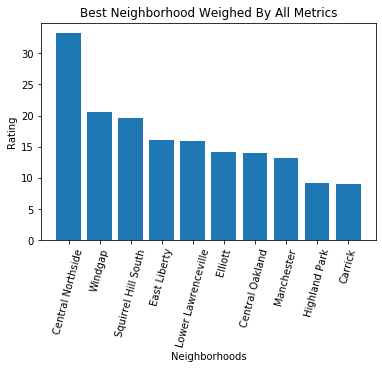

In [125]:

#converting back to series
final_metrics = pd.Series(final_weighted_dictionary)

#top 10 from series
final_metrics.sort_values(ascending=False)[:10]
print(final_metrics.sort_values(ascending=False)[:10])

#worst
#dataBridges_series.sort_values(ascending=True)[:20]

plt.bar(final_metrics.index[:10], final_metrics.sort_values(ascending=False)[:10])
plt.xlabel('Neighborhoods')
plt.ylabel('Rating')
plt.title('Best Neighborhood Weighed By All Metrics')
plt.xticks(rotation=75)

plt.show()

# Conclusions

Personally, I have a hard time picking a favorite neighborhood. If I had to choose within the city limits, I think Crafton/Ingram would be my top picks. They're more familiar to me, as the buildings there remind me of my hometown. Obviously compared to the final metric, my picks are nowhere near the "best"